In [2]:
import os
import importlib
import numpy as np
import pandas as pd

from fem_2d import display_results
from NeuralNetwork import NN_data_format
from NeuralNetwork import NN_tf_keras
from keras import backend as K
from keras.models import load_model

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.utils import np_utils

from itertools import product
from matplotlib import pyplot as plt
import seaborn as sns
plt.set_cmap('Set1')

<Figure size 432x288 with 0 Axes>

In [3]:
os.chdir('.\\FEM_results_new')

In [4]:
list_archives = os.listdir()

In [5]:
# inputs and outputs of Neural Network
arr_input = np.load('input_configs.npy')
arr_output_reactions = np.load('output_reactions.npy')
arr_output_displacements = np.load('output_displacement.npy')
arr_output_stresses = np.load('output_stresses.npy')
arr_output_vonMises = np.load('output_vonMises.npy')

_arrays = (arr_input, arr_output_reactions, arr_output_stresses, arr_output_displacements, arr_output_vonMises)

In [6]:
# Dataframes - easier to handle the multiple plots and filtering
_dfs = NN_data_format.construct_df(*_arrays, nodal_reactions = 1)
df_input, df_reactions, df_stresses, df_displacement, df_point_displacement, df_vonMises = _dfs

In [7]:
del _dfs, _arrays

In [ ]:
df_input.describe()

In [ ]:
df_vonMises.describe()

In [ ]:
df_stresses.describe()

In [ ]:
df_displacement.describe()

In [ ]:
df_point_displacement.describe()

In [ ]:
df_input.info()

In [ ]:
df_stresses.info()

In [ ]:
df_displacement.info()

In [ ]:
df_point_displacement.info()

### Results maximum displacement at point A (10,0.5) in y direction
- x-axis : Force
- x-axis : Geometry (3 - one for length, other for thickness and other for heigth)
- x-axis : Young modulus

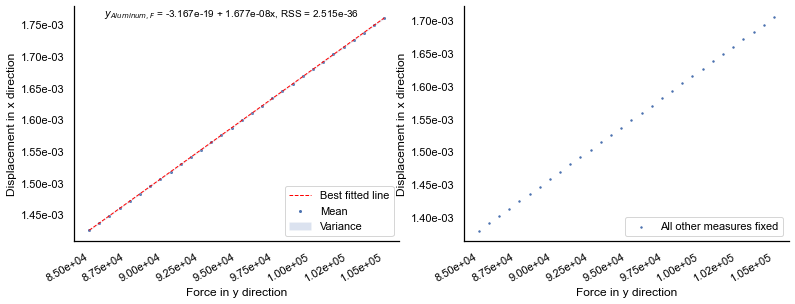

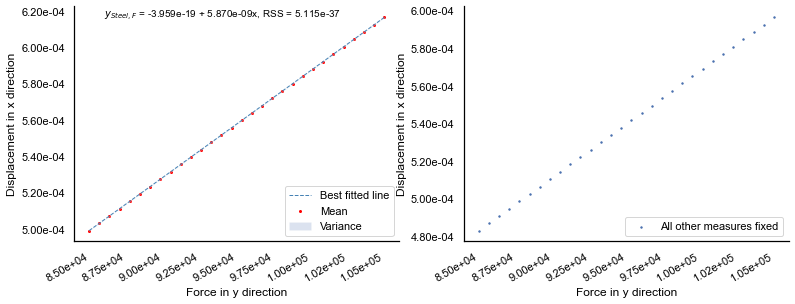

In [10]:
# Results of max displacement
df_fem = df_displacement.merge(df_input, on = 'case', how = 'left')
# Plot mean and variance of displacement for magnitude variation
display_results.mean_force_results(df_fem, var_evalutation = 'max_x', load_direction = 2, var_flag = 1)

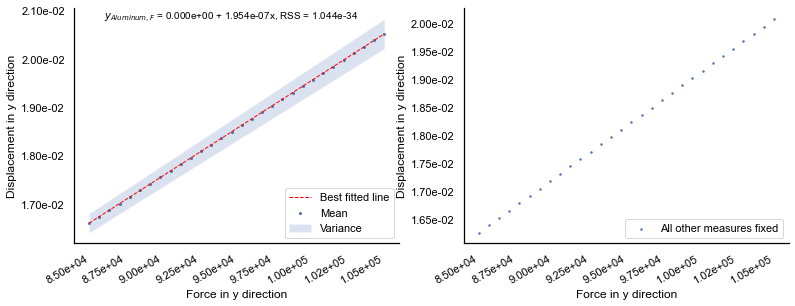

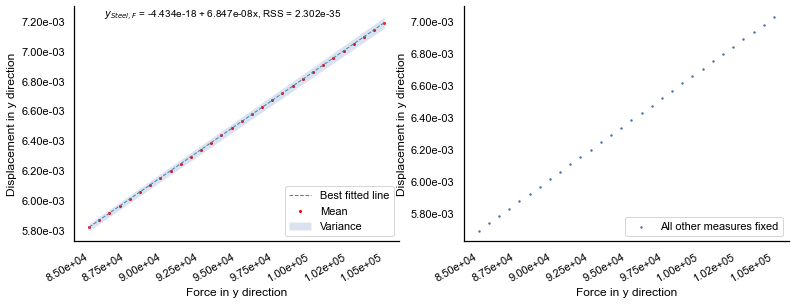

In [28]:
# Results of max displacement
df_fem = df_displacement.merge(df_input, on = 'case', how = 'left')
# Plot mean and variance of displacement for magnitude variation
display_results.mean_force_results(df_fem, var_evalutation = 'max_y', load_direction = 2, var_flag = 1)

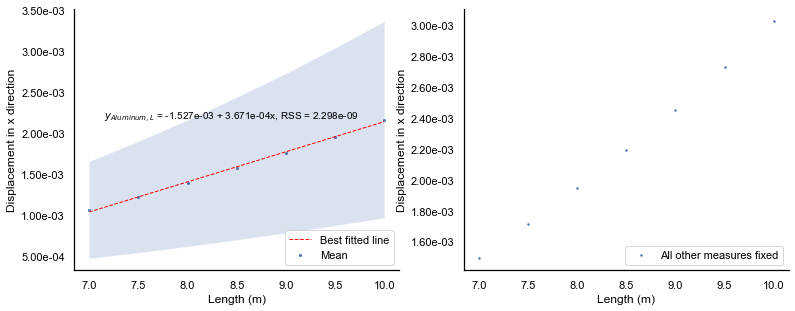

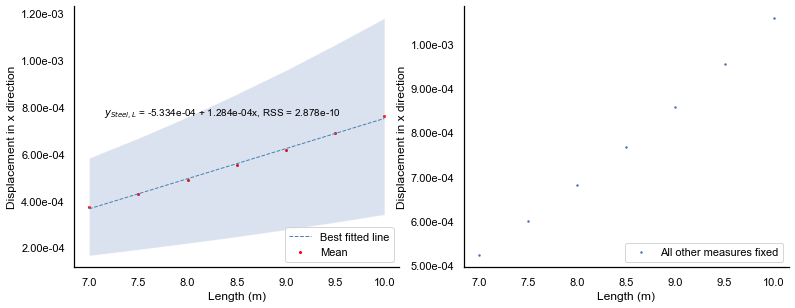

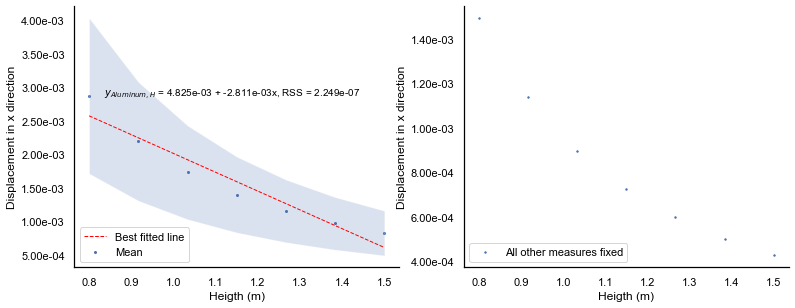

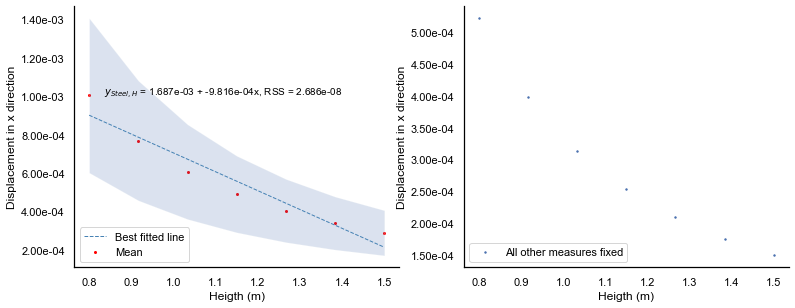

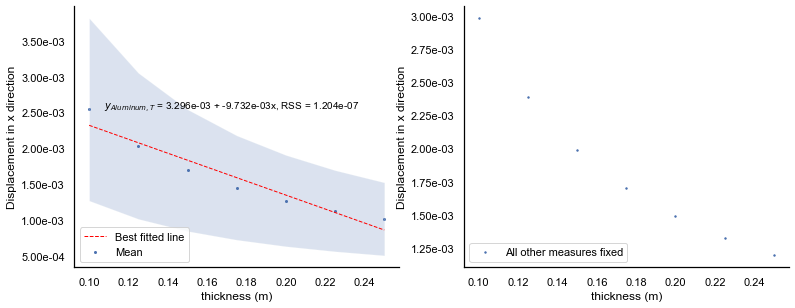

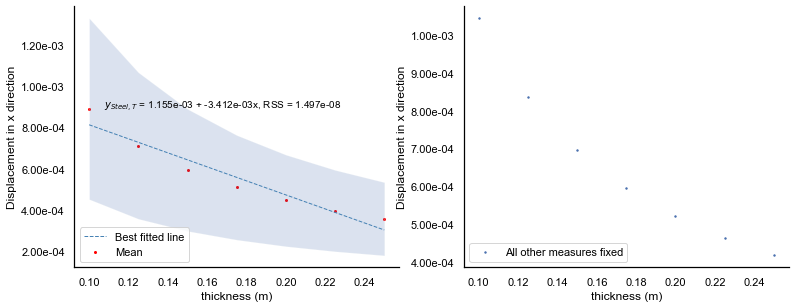

In [11]:
# Plot mean and variance of displacement for geometry measure variation
display_results.mean_geometry_results(df_fem, var_evalutation = 'max_x', load_direction = 2, var_flag = 1)

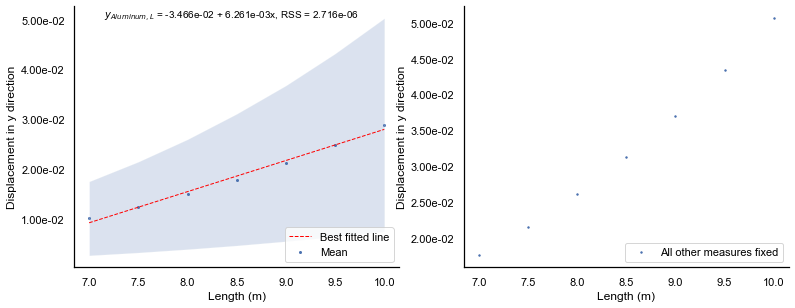

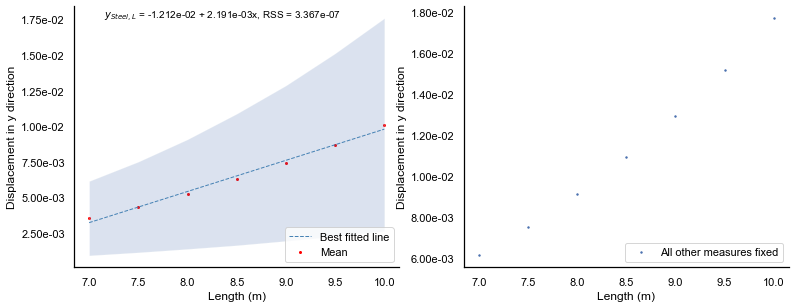

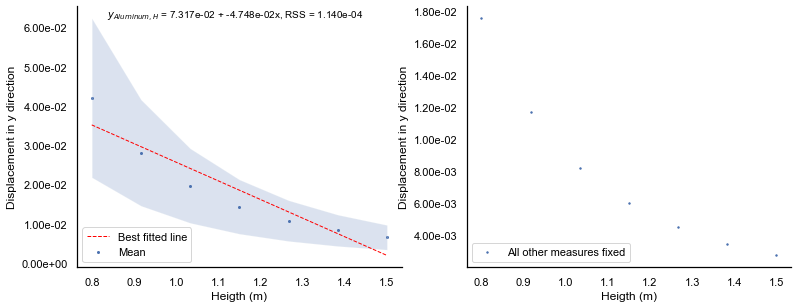

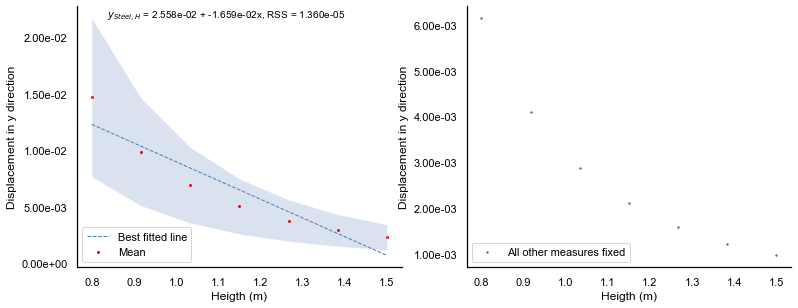

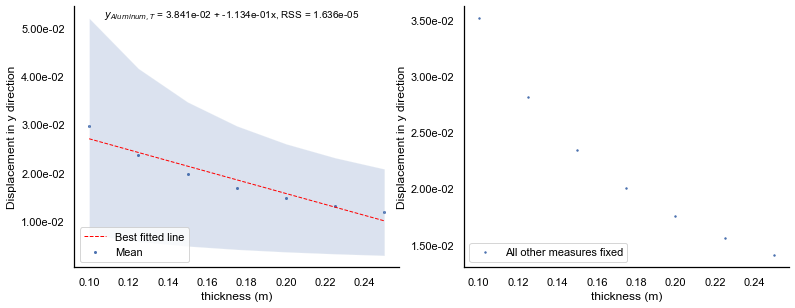

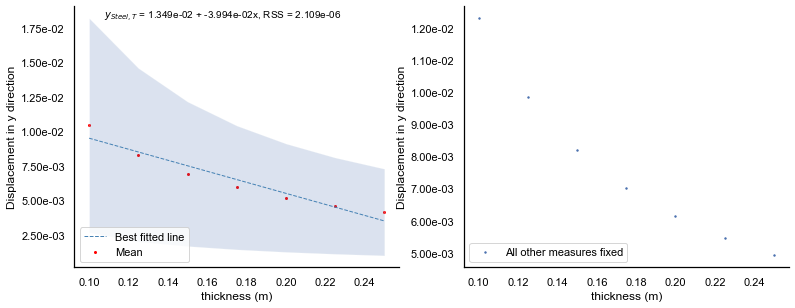

In [29]:
# Plot mean and variance of displacement for geometry measure variation
display_results.mean_geometry_results(df_fem, var_evalutation = 'max_y', load_direction = 2, var_flag = 1)

In [38]:
importlib.reload(display_results)

<module 'fem_2d.display_results' from 'C:\\Users\\kenjiuj\\OneDrive - Votorantim\\Docs\\KENJI URAZAKI JUNIOR\\UNIPD\\3 Semestre\\Advanced solid mechanics\\Project\\FEM 2D code\\fem_2d\\display_results.py'>

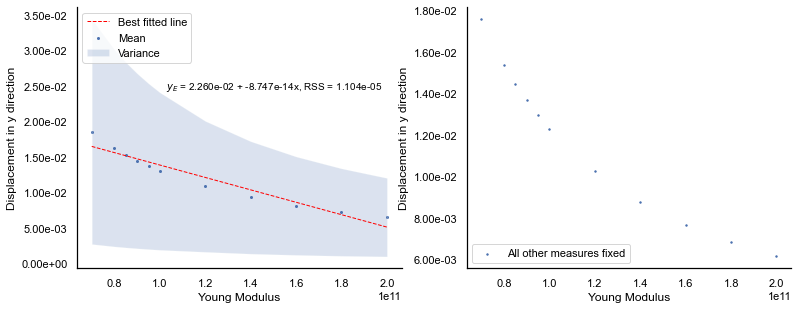

In [39]:
display_results.mean_young_results(df_fem, var_evalutation = 'max_y', load_direction = 2, var_flag = 1)

### Resultados maximum nodal stress

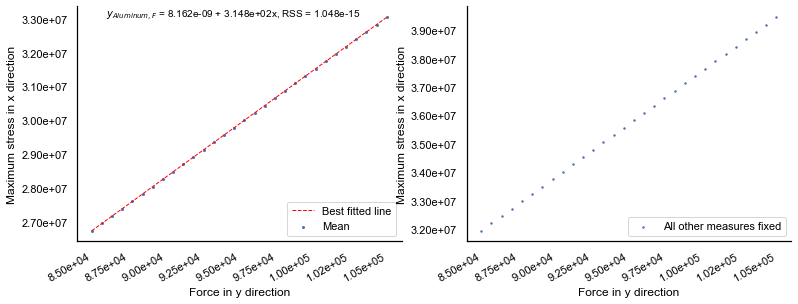

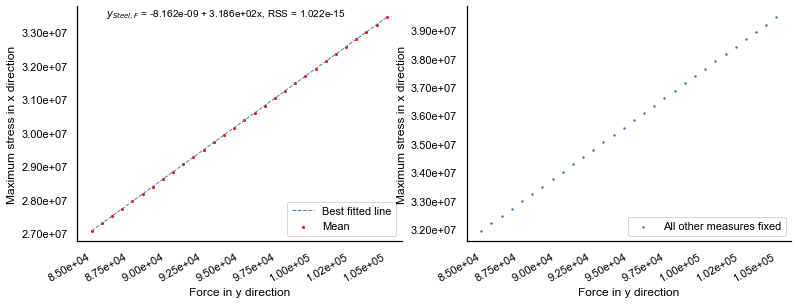

In [12]:
# # Results of ABS max nodal stress
df_fem = df_stresses.merge(df_input, on = 'case', how = 'left')
# Plot mean and variance of displacement for magnitude variation
display_results.mean_force_results(df_fem, var_evalutation = 'max_x_stress', load_direction = 2, var_flag = 0)

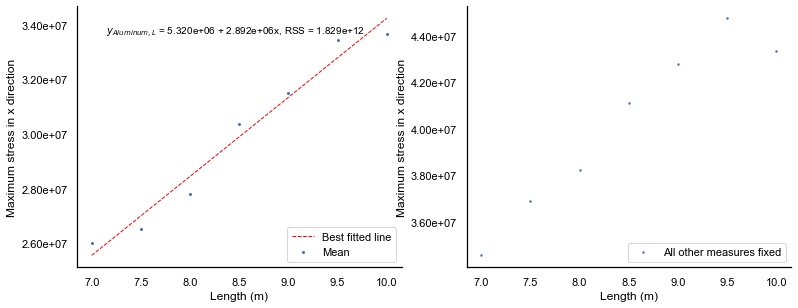

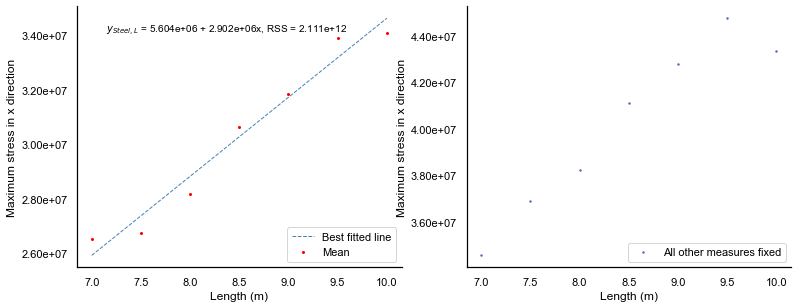

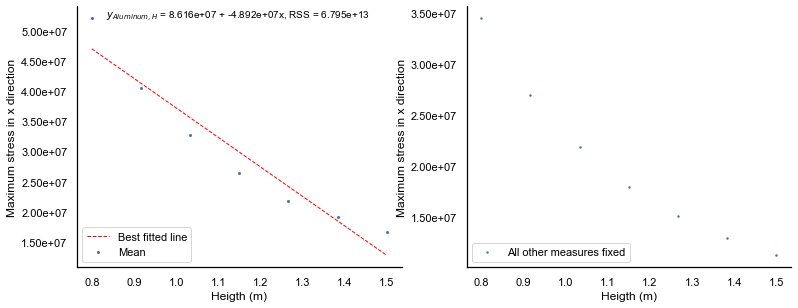

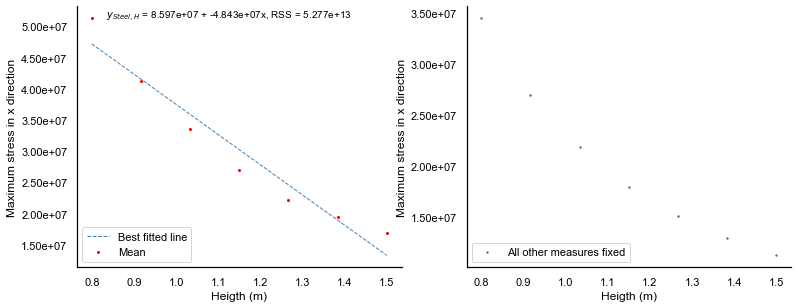

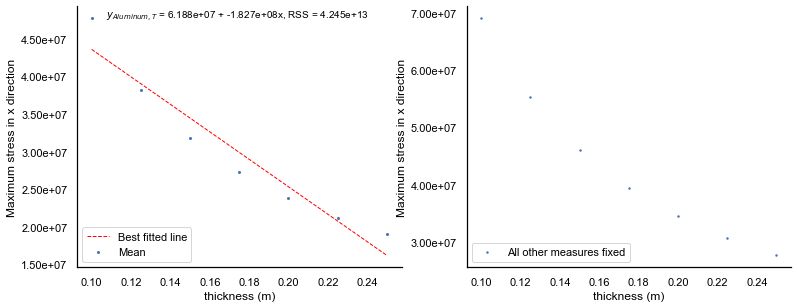

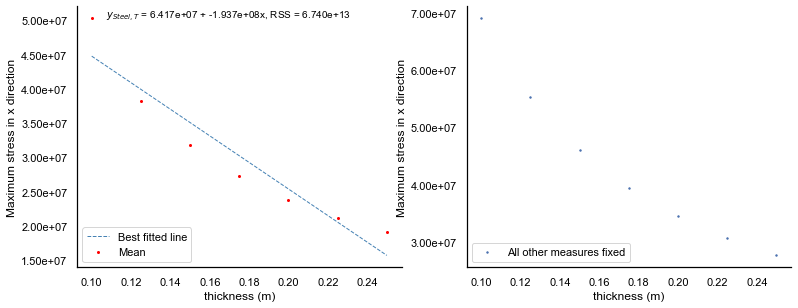

In [54]:
# Plot mean and variance of displacement for geometry measure variation
display_results.mean_geometry_results(df_fem, var_evalutation = 'max_x_stress', load_direction = 2, var_flag = 0)

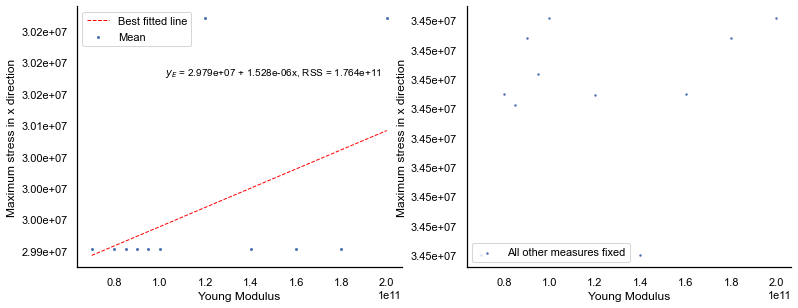

In [65]:
display_results.mean_young_results(df_fem, var_evalutation = 'max_x_stress', load_direction = 2, var_flag = 0)

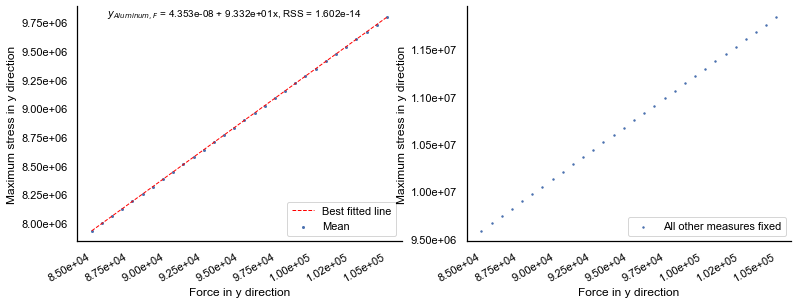

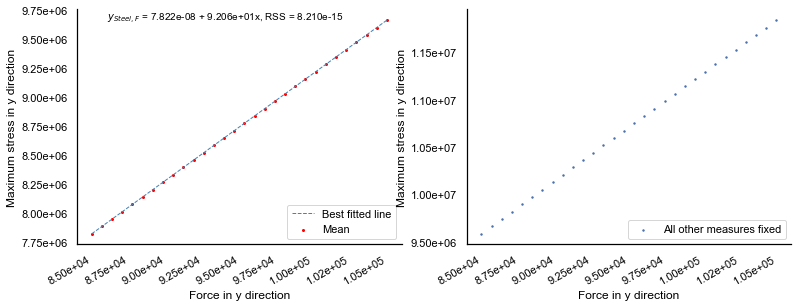

In [66]:
# Plot mean and variance of displacement for magnitude variation
display_results.mean_force_results(df_fem, var_evalutation = 'max_y_stress', load_direction = 2, var_flag = 0)

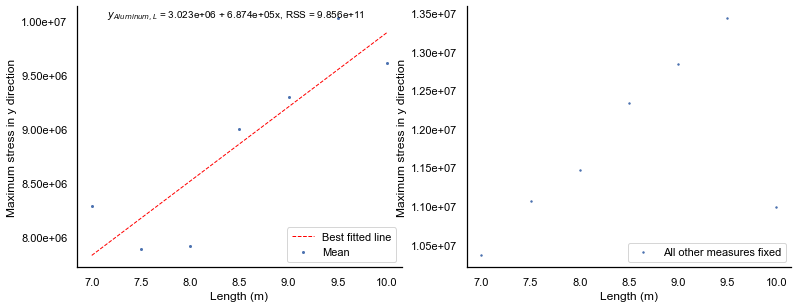

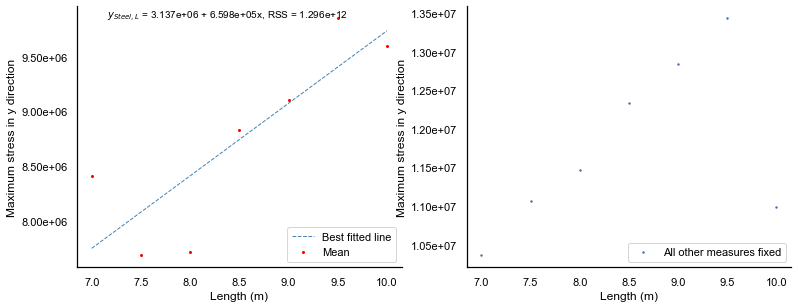

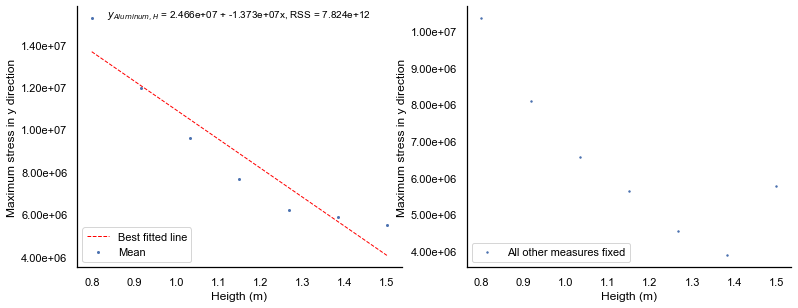

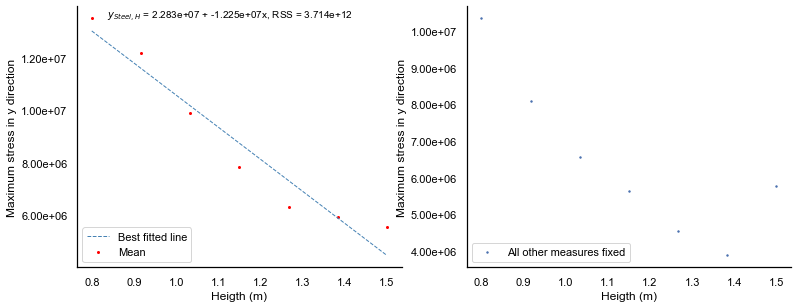

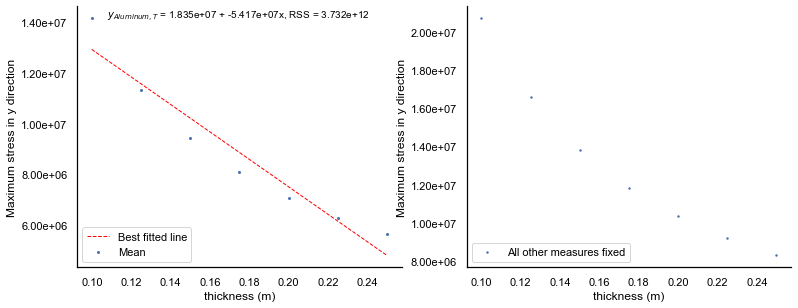

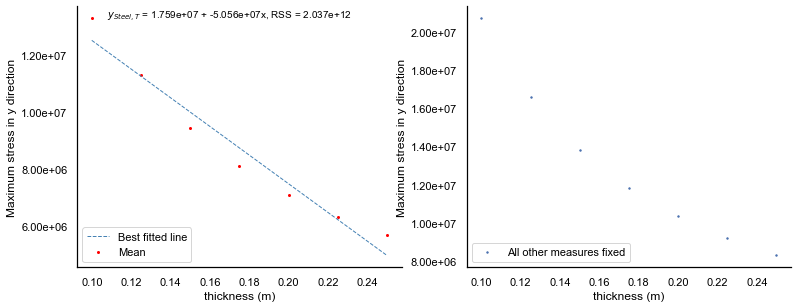

In [68]:
# Plot mean and variance of displacement for geometry measure variation
display_results.mean_geometry_results(df_fem, var_evalutation = 'max_y_stress', load_direction = 2, var_flag = 0)

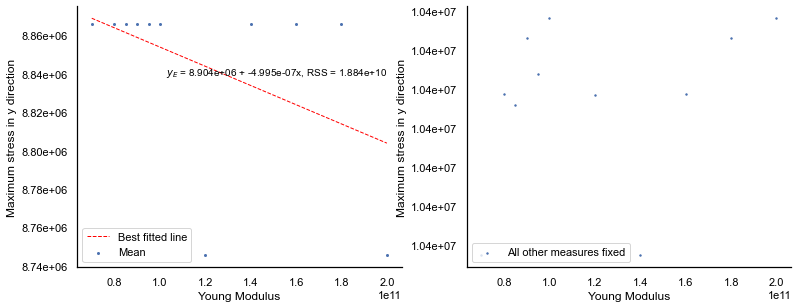

In [69]:
display_results.mean_young_results(df_fem, var_evalutation = 'max_y_stress', load_direction = 2, var_flag = 0)

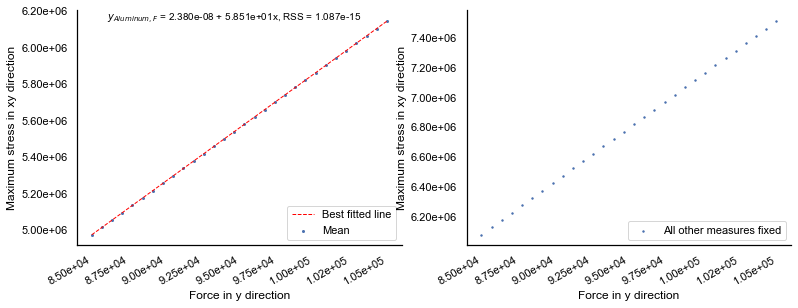

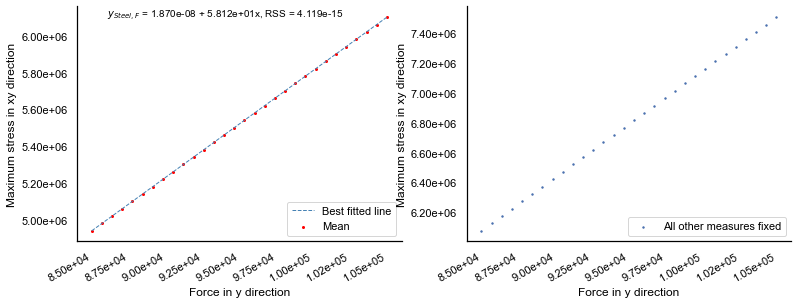

In [70]:
# Plot mean and variance of displacement for magnitude variation
display_results.mean_force_results(df_fem, var_evalutation = 'max_xy_stress', load_direction = 2, var_flag = 0)

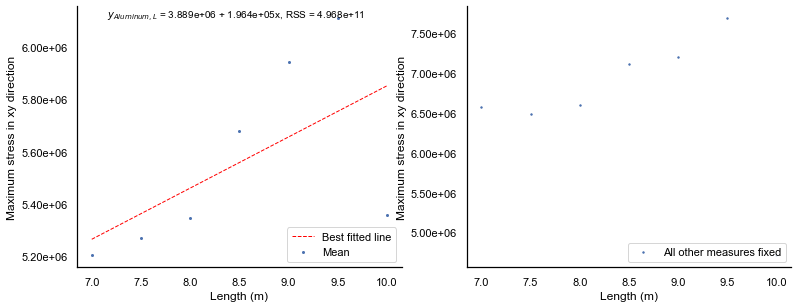

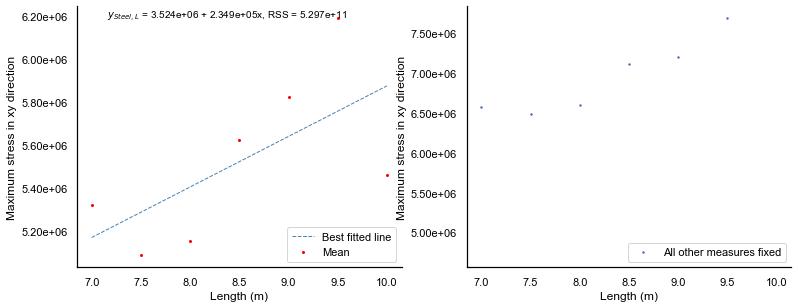

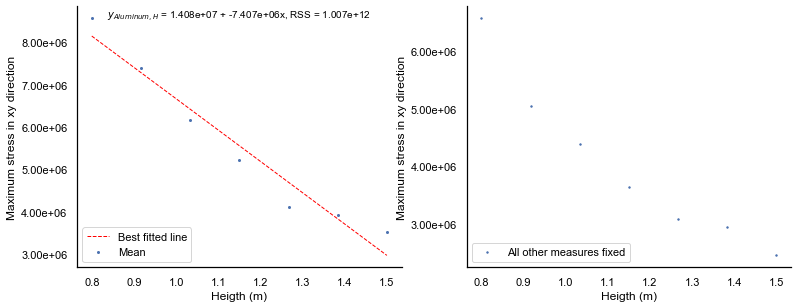

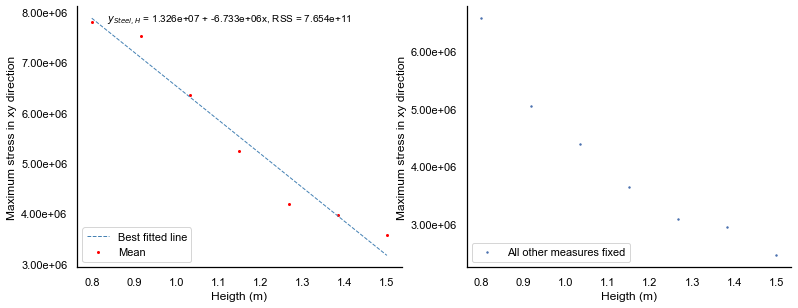

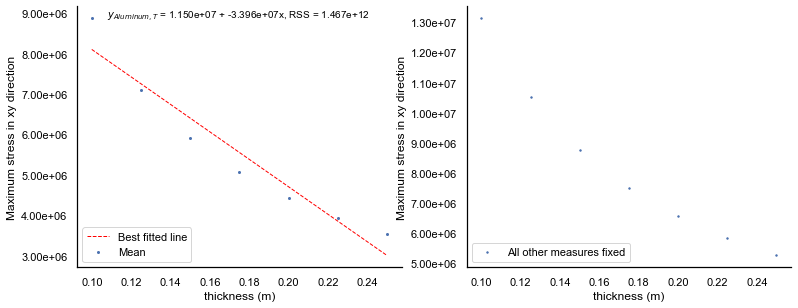

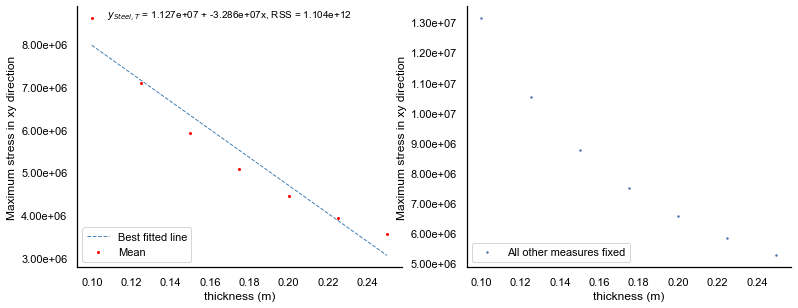

In [72]:
# Plot mean and variance of displacement for geometry measure variation
display_results.mean_geometry_results(df_fem, var_evalutation = 'max_xy_stress', load_direction = 2, var_flag = 0)

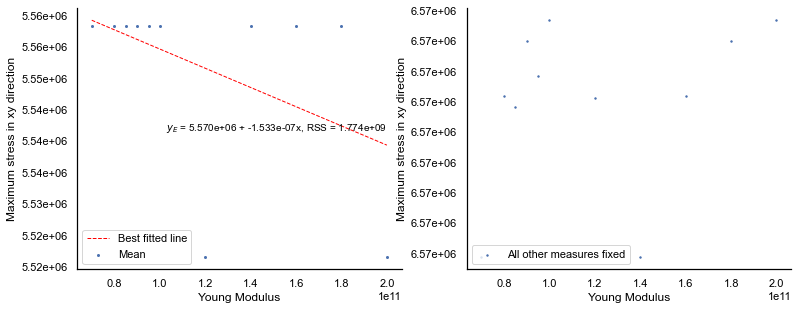

In [73]:
display_results.mean_young_results(df_fem, var_evalutation = 'max_xy_stress', load_direction = 2, var_flag = 0)

### Maximum von Mises stress

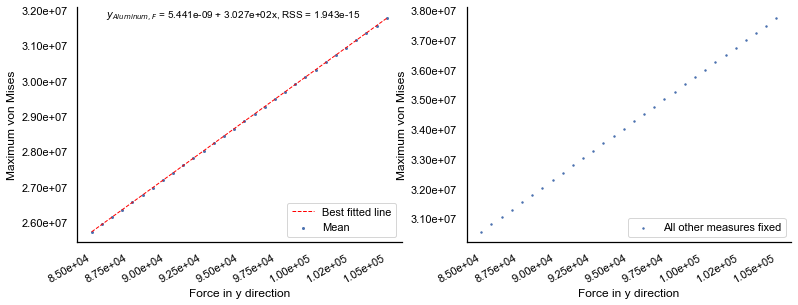

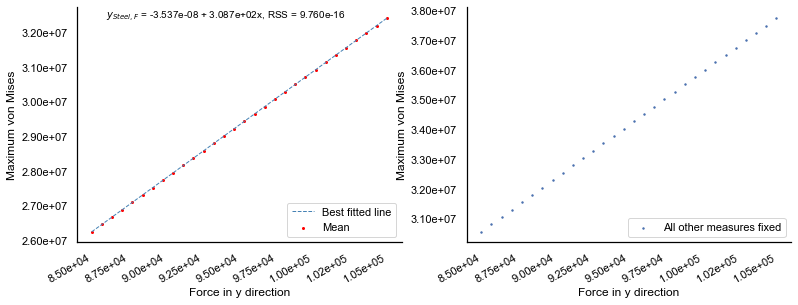

In [74]:
# # Results of ABS max nodal stress
df_fem = df_vonMises.merge(df_input, on = 'case', how = 'left')
# Plot mean and variance of displacement for magnitude variation
display_results.mean_force_results(df_fem, var_evalutation = 'vonMises', load_direction = 2, var_flag = 0)

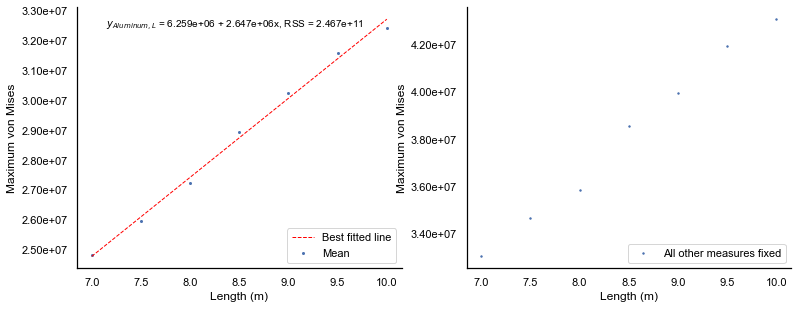

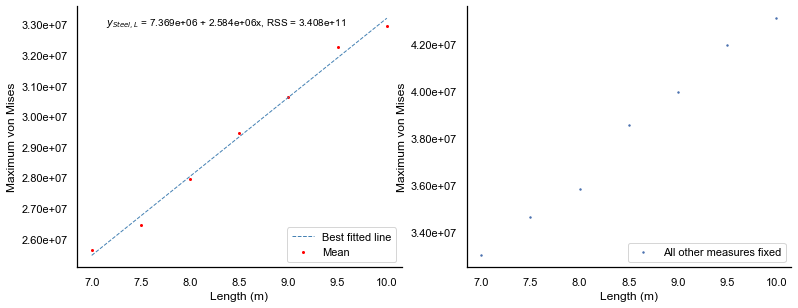

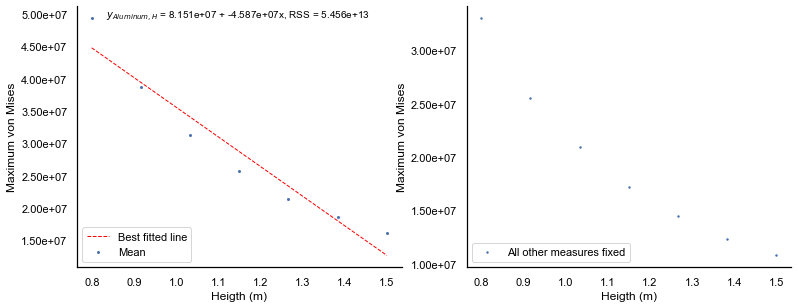

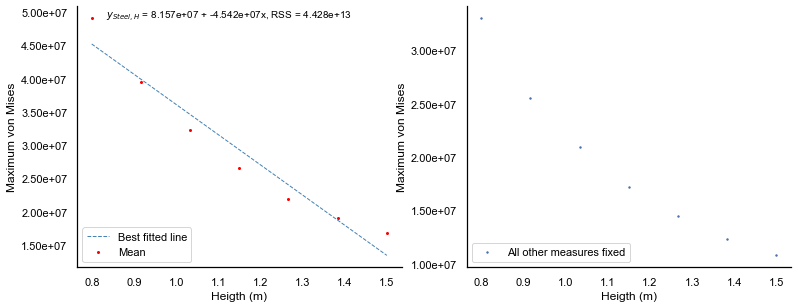

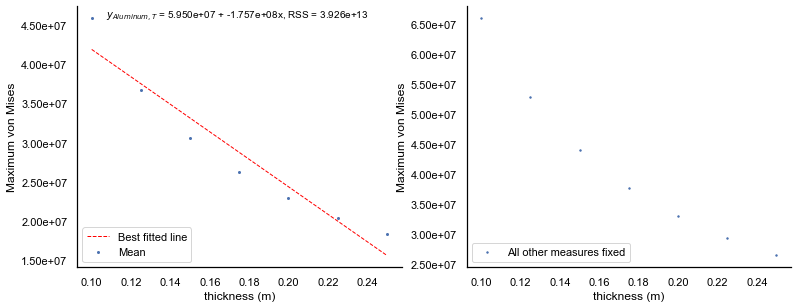

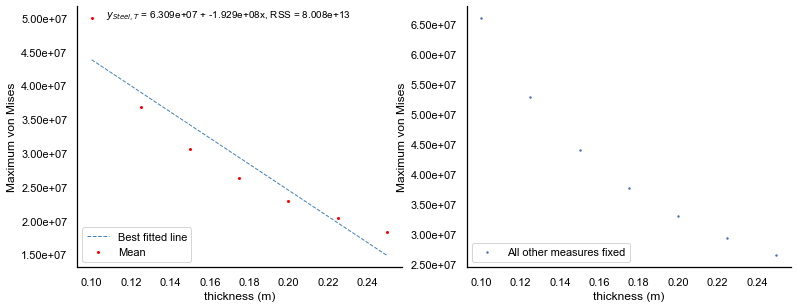

In [76]:
# Plot mean and variance of displacement for geometry measure variation
display_results.mean_geometry_results(df_fem, var_evalutation = 'vonMises', load_direction = 2, var_flag = 0)

 ### Max displacement vs Max stress - not continued

In [ ]:
# # Results of ABS max nodal stress
df_fem = df_displacement.merge(df_input, on = 'case', how = 'left')
df_fem = df_fem.merge(df_stresses, on = 'case', how = 'left')

In [ ]:
# Check if rule 1 is followed: 
# "Rule 1: Deflection in a beam of more than half the beam's thickness will tend to require nonlinear geometry"
assert (df_fem['thick']/2 <= df_fem['max_y']).sum() == 0, "There is higher deflection than half of beam's thickness"

In [ ]:
# Thickness count that breaks rule 1
df_fem[df_fem['thick']/2 <= df_fem['max_y']].groupby('thick').count()

In [ ]:
# select just one structure
df_plot = df_fem[(df_fem['rect_length'] == 7)&(df_fem['rect_heigth'] == 1.5)&\
                 (df_fem['thick'] == 0.2)&(df_fem['material_young'] == 9e10)]
axis_labels = {'x':'Maximum displacement in y direction', 'y':'Maximum stress in x direction'}
display_results.plot_scatter(df_plot['max_y'], df_plot['max_xy_stress'], 'max_displacementvsxstress',\
             axis_labels, marker_size = 1, y_scale = 'linear', x_scale = 'linear')

In [ ]:
axis_labels = {'x':'Maximum displacement in y direction', 'y':'Maximum stress in x direction'}
display_results.plot_scatter(df_fem['max_y'], df_fem['max_x_stress'], 'max_displacementvsxstress',\
             axis_labels, marker_size = 1, y_scale = 'linear', x_scale = 'linear')

In [ ]:
axis_labels = {'x':'Maximum displacement in y direction', 'y':'Maximum stress in y direction'}
display_results.plot_scatter(df_fem['max_y'], df_fem['max_y_stress'], 'max_displacementvsystress',\
             axis_labels, marker_size = 1, y_scale = 'linear', x_scale = 'linear')

In [ ]:
axis_labels = {'x':'Maximum displacement in y direction', 'y':'Maximum stress in xy direction'}
display_results.plot_scatter(df_fem['max_y'], df_fem['max_xy_stress'], 'max_displacementvsxystress',\
             axis_labels, marker_size = 1, y_scale = 'linear', x_scale = 'linear')

 ### Data scaling

In [ ]:
displacement_output_scaled, scaler_displacement, arr_displacement_output = \
NN_data_format.scale_dataframe(df_displacement, ['max_y'])

display_results.plot_hist_boxplot(arr_displacement_output, 'Displacement (m)', 'hist_boxplot_maxuy')
display_results.plot_hist_boxplot(displacement_output_scaled, 'Scaled Displacement (m)', 'hist_boxplot_stdmaxuy')

In [ ]:
vonmises_output_scaled, scaler_vonmises, arr_vonmises_output = \
NN_data_format.scale_dataframe(df_vonMises, ['vonMises'])

display_results.plot_hist_boxplot(arr_vonmises_output, 'von Mises stress (Pa)', 'hist_boxplot_vonmises')
display_results.plot_hist_boxplot(vonmises_output_scaled, 'Scaled von Mises stress (Pa)', 'hist_boxplot_stdvonmises')

# Neural Networks

In [ ]:
os.chdir('.\\final_NN')

## NN output max displacement

In [8]:
df = df_input.merge(df_displacement[['case', 'max_y']], on = 'case')
df = df[df['load_direction'] == 2]
features = ['rect_length', 'rect_heigth', 'thick', 'load_magnitude', 'material_young', 'material_poisson']
target =  ['max_y']
data = NN_data_format.data_splittingandscaling(df, features, target, test_percentage = 0.10) #10% of data for testing

In [9]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [10]:
# Model
builder_model = NN_tf_keras.NN_model(input_size = len(features), output_size = len(target))
builder_model.loss = 'mse'
builder_model.metrics = ['mse', coeff_determination]

In [11]:
builder_model.__dict__

{'model_name': '',
 'input_size': 6,
 'output_size': 1,
 'hidden1_size': 128,
 'hidden1_dropout': 0.2,
 'hidden1_activation': 'relu',
 'n_hiddenlayers': 2,
 'hidden2_size': 128,
 'hidden2_dropout': 0.2,
 'hidden2_activation': 'relu',
 'output_activation': 'relu',
 'learning_rate': 0.001,
 'loss': 'mse',
 'metrics': ['mse', <function __main__.coeff_determination(y_true, y_pred)>]}

In [ ]:
# Created grid
topologies = {'hidden_layers': [1], # From the relations seen before, one hidden layer is probably enough
              'Neurons' : [16, 32, 64, 128],
              'dropout' : [0.1, 0.2, 0.3],
              'batchsize' : [16, 32, 64, 128],
              'start_learning_rate' : [0.01]}

In [ ]:
dict_NN = {'name' : 'Maxdisplacement', 
       'hidden1_size' : 0,
       'hidden1_dropout' : 0,
       'n_hiddenlayers' : topologies['hidden_layers'][0],
       'hidden2_size' : 0,
       'hidden2_dropout' : 0,
       'learning_rate' : topologies['start_learning_rate'][0],
       'batch_size' : 0,
       'cv_number' : 0,
       'train_idx' : 0,
       'val_idx' : 0
      }
histories = pd.DataFrame()
name = 'Maxdisplacement'
i_model = 0
for i_neuron in topologies['Neurons']:
    dict_NN['hidden1_size'] = i_neuron
    for i_dropout in topologies['dropout']:
        dict_NN['hidden1_dropout'] = i_dropout
        for i_batch in topologies['batchsize']:
            dict_NN['batch_size'] = i_batch
            i_model += 1
            for j, (train_idx, val_idx) in enumerate(NN_data_format.split_traindata(data[0], None)):
                dict_NN['name'] = name + '_' + str(i_model) + '_CV_' + str(j)
                dict_NN.update({'cv_number' : j, 'train_idx' : train_idx, 'val_idx' : val_idx})
                history = NN_tf_keras.start_NN(data, builder_model, dict_NN)
                history_model = pd.DataFrame(history.history).reset_index().rename(columns = {'index':'epoch'})
                history_model['neurons'] = i_neuron
                history_model['dropout'] = i_dropout
                history_model['batch_size'] = i_batch
                history_model['model_name'] = dict_NN['name']
                history_model['cv'] = j
                histories = pd.concat([histories, history_model], axis = 0)

In [ ]:
save_history = False
if save_history == True:
    histories.to_csv(name + '_allmodels.csv')

In [68]:
# Load saved history
if save_history == False:
    name = 'Maxdisplacement'
    histories = pd.read_csv(name + '_allmodels.csv')

In [69]:
histories['model_id'] = histories['model_name'].apply(lambda a: int(a.split('_')[1]))

In [47]:
# Minimum viable
models_selected = histories.groupby(['model_id', 'cv'])['val_coeff_determination'].max().reset_index()
models_selected = models_selected[models_selected['val_coeff_determination'] > 0]
models_selected = pd.DataFrame(list(models_selected['model_id'].unique()), columns = ['model_id'])
models_selected['select'] = 1
histories = histories.merge(models_selected, on = 'model_id', how = 'left')
df_minimum = histories[histories['select'] == 1]

In [48]:
df_max = df_minimum.groupby(['model_id', 'cv'])['val_coeff_determination'].max().reset_index()
df_mean = df_max.groupby(['model_id']).mean().reset_index()

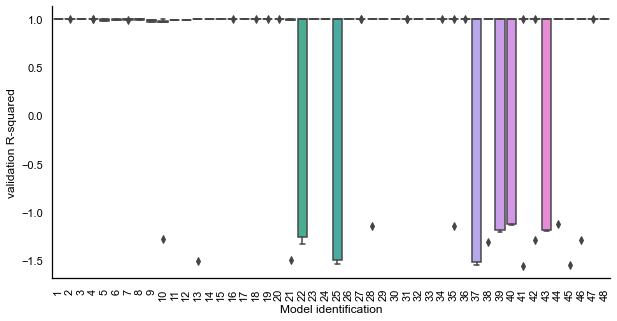

In [51]:
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
sns.boxplot(x = df_max['model_id'], y = df_max['val_coeff_determination'])
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_xlabel('Model identification')
ax.set_ylabel('validation R-squared')
plt.savefig(f"figures/boxplot_r2_NNmaxuy.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

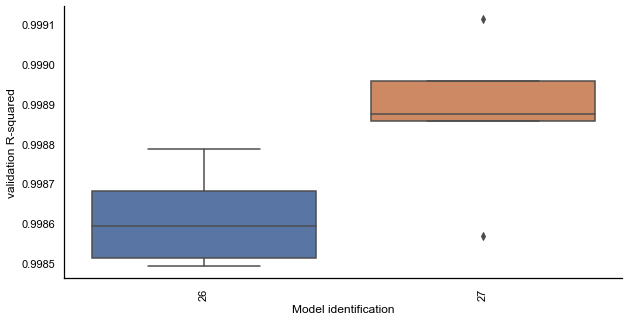

In [60]:
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
sns.boxplot(x = df_max.query('model_id == 26 or model_id == 27')['model_id'],
            y = df_max.query('model_id == 26 or model_id == 27')['val_coeff_determination'])
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_xlabel('Model identification')
ax.set_ylabel('validation R-squared')
plt.savefig(f"figures/boxplot_r2_NNmaxuy_zoom.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

In [35]:
df_minimum = histories.copy()
df_max = df_minimum.groupby(['model_id', 'cv'])['val_mse'].min().reset_index()
df_mean = df_max.groupby(['model_id']).mean().reset_index()

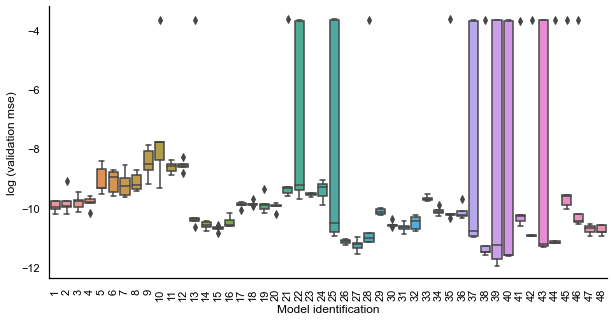

In [36]:
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
sns.boxplot(x = df_max['model_id'], y = np.log(df_max['val_mse']))
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_xlabel('Model identification')
ax.set_ylabel('log (validation mse)')
plt.savefig(f"figures/boxplot_mse_NNmaxuy.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

354/354 [==============================] - 0s 1ms/step
['loss', 'mae', 'mse', 'coeff_determination']
354/354 [==============================] - 1s 1ms/step - loss: 0.0158 - mae: 0.0879 - mse: 0.0158 - coeff_determination: -126.1272
[0.015840444713830948, 0.08791575580835342, 0.015840444713830948, -126.127197265625]


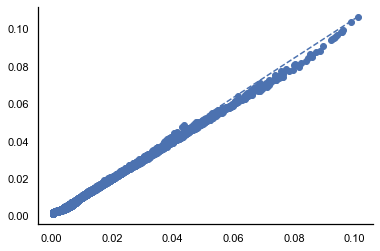

In [97]:
# Print test error for model selected
NN_tf_keras.test_error(data, 'Maxdisplacement_27_CV_4')

#### Train and predict for best model

In [12]:
# Model 27
i_neuron = 64 
i_dropout = 0.1
i_batch = 64

dict_NN = {'name' : 'Maxdi0splacement', 
       'hidden1_size' : 0,
       'hidden1_dropout' : 0,
       'n_hiddenlayers' : 1,
       'hidden2_size' : 0,
       'hidden2_dropout' : 0,
       'learning_rate' : 0.01,
       'batch_size' : 0,
       'cv_number' : 0,
       'train_idx' : 0,
       'val_idx' : 0
      }

name = 'Maxdisplacement'

dict_NN['hidden1_size'] = i_neuron
dict_NN['hidden1_dropout'] = i_dropout
dict_NN['batch_size'] = i_batch

history = NN_tf_keras.start_NN(data, builder_model, dict_NN, CV = False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1584/1592 [============================>.] - ETA: 0s - loss: 0.0013 - mse: 0.0013 - coeff_determination: 0.8599
Epoch 1: val_loss improved from inf to 0.00007, saving model to best_model_Maxdisplacement.h5
1592/1592 [==============================] - 8s 4ms/step - loss: 0.0013 - mse: 0.0013 - coeff_determinati

Epoch 19/50
1563/1592 [============================>.] - ETA: 0s - loss: 1.1219e-04 - mse: 1.1219e-04 - coeff_determination: 0.9882
Epoch 19: val_loss did not improve from 0.00002

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0001.
1592/1592 [==============================] - 5s 3ms/step - loss: 1.1211e-04 - mse: 1.1211e-04 - coeff_determination: 0.9881 - val_loss: 1.9112e-05 - val_mse: 1.9112e-05 - val_coeff_determination: 0.9978 - lr: 1.0000e-03
Epoch 20/50
1580/1592 [============================>.] - ETA: 0s - loss: 1.0458e-04 - mse: 1.0458e-04 - coeff_determination: 0.9888
Epoch 20: val_loss improved from 0.00002 to 0.00001, saving model to best_model_Maxdisplacement.h5
1592/1592 [==============================] - 4s 3ms/step - loss: 1.0441e-04 - mse: 1.0441e-04 - coeff_determination: 0.9888 - val_loss: 1.4580e-05 - val_mse: 1.4580e-05 - val_coeff_determination: 0.9984 - lr: 1.0000e-04
Epoch 21/50
1563/1592 [============================>.] - ETA: 0s - loss: 1.0625e-04 - 

Epoch 39/50
1561/1592 [============================>.] - ETA: 0s - loss: 1.0370e-04 - mse: 1.0370e-04 - coeff_determination: 0.9889
Epoch 39: val_loss did not improve from 0.00001
1592/1592 [==============================] - 4s 3ms/step - loss: 1.0383e-04 - mse: 1.0383e-04 - coeff_determination: 0.9889 - val_loss: 1.3457e-05 - val_mse: 1.3457e-05 - val_coeff_determination: 0.9985 - lr: 1.0000e-04
Epoch 40/50
1569/1592 [============================>.] - ETA: 0s - loss: 1.0530e-04 - mse: 1.0530e-04 - coeff_determination: 0.9888
Epoch 40: val_loss did not improve from 0.00001
1592/1592 [==============================] - 4s 3ms/step - loss: 1.0519e-04 - mse: 1.0519e-04 - coeff_determination: 0.9888 - val_loss: 1.3698e-05 - val_mse: 1.3698e-05 - val_coeff_determination: 0.9985 - lr: 1.0000e-04
Epoch 41/50
1590/1592 [============================>.] - ETA: 0s - loss: 1.0634e-04 - mse: 1.0634e-04 - coeff_determination: 0.9887
Epoch 41: val_loss did not improve from 0.00001
1592/1592 [=========

In [43]:
scaled_target = True
saved_model = load_model('best_model_Maxdisplacement.h5', custom_objects={"coeff_determination": coeff_determination})
Y_pred = saved_model.predict(data[1])
if scaled_target == True:
    scaler_output = data[-1]
    Y_pred = scaler_output.inverse_transform(Y_pred)
    Y_test = scaler_output.inverse_transform(data[3])
    print(saved_model.metrics_names)
    print(saved_model.evaluate(data[1], Y_test))

354/354 [==============================] - 0s 1ms/step
['loss', 'mse', 'coeff_determination']
354/354 [==============================] - 1s 1ms/step - loss: 0.0159 - mse: 0.0159 - coeff_determination: -126.5435
[0.01590498350560665, 0.01590498350560665, -126.54349517822266]


In [65]:
# R^2 and mean absolute and relative error
print(f'MAE {np.mean(np.abs(Y_test - Y_pred))}')
print(f'Relative = MAE/mean = {np.mean(np.abs(Y_test - Y_pred))/np.mean(Y_test)* 100}')
print(f'R^2: {r2_score(Y_test, Y_pred)*100}')

MAE 0.0002961416066709262
Relative = MAE/mean = 2.430859171114701
R^2: 99.87791202897316


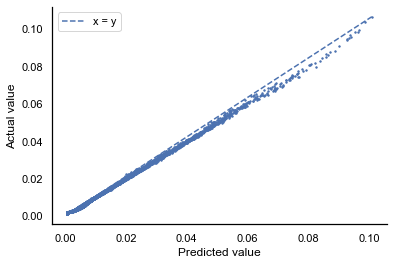

In [44]:
# Plot Y_pred and Y_test
fig = plt.figure()
ax = fig.gca()
ax.scatter(Y_pred, Y_test, s = 2)
ax.plot([Y_pred.min(), Y_pred.max()], [Y_test.min(), Y_test.max()], '--', label = 'x = y')
ax.set_ylabel('Actual value')
ax.set_xlabel('Predicted value')
ax.legend()
plt.savefig(f"figures/predictactual_displacement.pdf", bbox_inches = "tight", format = "pdf")

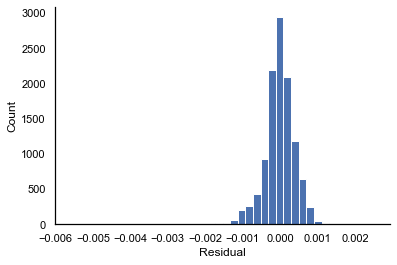

In [35]:
# Plot residuals distribution
fig = plt.figure()
ax = fig.gca()
ax.hist(Y_pred - Y_test, bins = 40)
ax.set_ylabel('Count')
ax.set_xlabel('Residual')
plt.savefig(f"figures/histresidual_displacement.pdf", bbox_inches = "tight", format = "pdf")

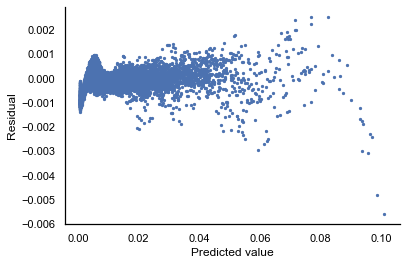

In [42]:
# Plot residuals vs actual value
fig = plt.figure()
ax = fig.gca()
plt.scatter(Y_pred, Y_pred - Y_test, s = 5)
ax.set_ylabel('Residual')
ax.set_xlabel('Predicted value')
plt.savefig(f"figures/predictedresidual_displacement.pdf", bbox_inches = "tight", format = "pdf")

## NN output max von Mises

In [89]:
df = df_input.merge(df_vonMises, on = 'case')
df = df[df['load_direction'] == 2]
features = ['rect_length', 'rect_heigth', 'thick', 'load_magnitude', 'material_young']
target =  ['vonMises']
data = NN_data_format.data_splittingandscaling(df, features, target, test_percentage = 0.10) #10% of data for testing

In [90]:
# Model
builder_model = NN_tf_keras.NN_model(input_size = len(features), output_size = len(target))

builder_model.loss = 'mse'
builder_model.metrics = ['mse', coeff_determination]

In [91]:
# Created grid
topologies = {'hidden_layers': [1], # From the relations seen before, one hidden layer is probably enough
              'Neurons' : [16, 32, 64, 128],
              'dropout' : [0.1, 0.2, 0.3],
              'batchsize' : [16, 32, 64, 128],
              'start_learning_rate' : [0.1]}

In [ ]:
dict_NN = {'name' : 'MaxvonMises', 
       'hidden1_size' : 0,
       'hidden1_dropout' : 0,
       'n_hiddenlayers' : topologies['hidden_layers'][0],
       'hidden2_size' : 0,
       'hidden2_dropout' : 0,
       'learning_rate' : topologies['start_learning_rate'][0],
       'batch_size' : 0,
       'cv_number' : 0,
       'train_idx' : 0,
       'val_idx' : 0
      }
histories = pd.DataFrame()
name = 'MaxvonMises'
i_model = 0
for i_neuron in topologies['Neurons']:
    dict_NN['hidden1_size'] = i_neuron
    for i_dropout in topologies['dropout']:
        dict_NN['hidden1_dropout'] = i_dropout
        for i_batch in topologies['batchsize']:
            dict_NN['batch_size'] = i_batch
            i_model += 1
            for j, (train_idx, val_idx) in enumerate(NN_data_format.split_traindata(data[0], None)):
                dict_NN['name'] = name + '_' + str(i_model) + '_CV_' + str(j)
                dict_NN.update({'cv_number' : j, 'train_idx' : train_idx, 'val_idx' : val_idx})
                history = NN_tf_keras.start_NN(data, builder_model, dict_NN)
                history_model = pd.DataFrame(history.history).reset_index().rename(columns = {'index':'epoch'})
                history_model['neurons'] = i_neuron
                history_model['dropout'] = i_dropout
                history_model['batch_size'] = i_batch
                history_model['model_name'] = dict_NN['name']
                history_model['cv'] = j
                histories = pd.concat([histories, history_model], axis = 0)

In [15]:
save_history = False
if save_history == True:
    histories.to_csv(name + '_allmodels.csv')

In [16]:
# Load saved history
if save_history == False:
    name = 'Maxvonmises'
    histories = pd.read_csv(name + '_allmodels.csv')

In [17]:
histories['model_id'] = histories['model_name'].apply(lambda a: int(a.split('_')[1]))

In [18]:
models_selected = histories.groupby(['model_id', 'cv'])['val_coeff_determination'].max().reset_index()
models_selected = models_selected[models_selected['val_coeff_determination'] > 0]
models_selected = pd.DataFrame(list(models_selected['model_id'].unique()), columns = ['model_id'])
models_selected['select'] = 1
histories = histories.merge(models_selected, on = 'model_id', how = 'left')

In [19]:
# Minimum viable
df_minimum = histories[histories['select'] == 1]
df_max = df_minimum.groupby(['model_id', 'cv'])['val_coeff_determination'].max().reset_index()
df_mean = df_max.groupby(['model_id']).mean().reset_index()

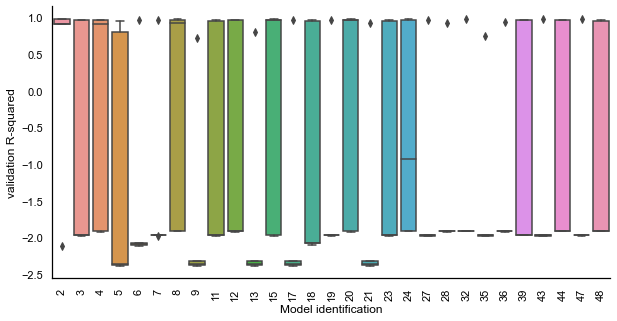

In [20]:
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
sns.boxplot(x = df_max['model_id'], y = df_max['val_coeff_determination'])
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_xlabel('Model identification')
ax.set_ylabel('validation R-squared')
plt.savefig(f"figures/boxplot_r2_vonMises.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

In [21]:
df_minimum = histories.copy()
df_max = df_minimum.groupby(['model_id', 'cv'])['val_mse'].min().reset_index()
df_mean = df_max.groupby(['model_id']).mean().reset_index()

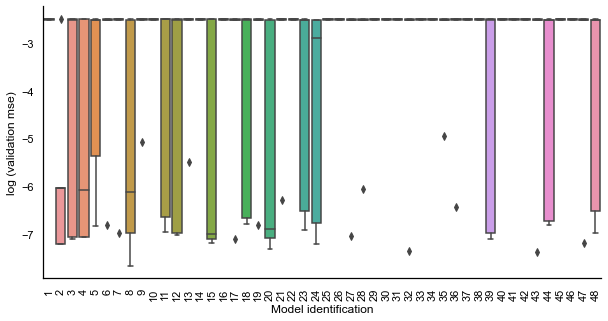

In [22]:
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
sns.boxplot(x = df_max['model_id'], y = np.log(df_max['val_mse']))
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.set_xlabel('Model identification')
ax.set_ylabel('log (validation mse)')
plt.savefig(f"figures/boxplot_mse_vonMises.pdf", bbox_inches = "tight", format = "pdf")
plt.show()

#### Train and predict for best model

In [93]:
# Model 2
i_neuron = 16
i_dropout = 0.1
i_batch = 32

dict_NN = {'name' : 'Maxvonmises_2', 
       'hidden1_size' : 0,
       'hidden1_dropout' : 0,
       'n_hiddenlayers' : 1,
       'hidden2_size' : 0,
       'hidden2_dropout' : 0,
       'learning_rate' : 0.01,
       'batch_size' : 0,
       'cv_number' : 0,
       'train_idx' : 0,
       'val_idx' : 0
      }

name = 'Maxvonmises_2'

dict_NN['hidden1_size'] = i_neuron
dict_NN['hidden1_dropout'] = i_dropout
dict_NN['batch_size'] = i_batch

history = NN_tf_keras.start_NN(data, builder_model, dict_NN, CV = False)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                96        
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3154/3184 [============================>.] - ETA: 0s - loss: 0.0020 - mse: 0.0020 - coeff_determination: 0.9197
Epoch 1: val_loss improved from inf to 0.00143, saving model to best_model_Maxvonmises_2.h5
3184/3184 [==============================] - 9s 3ms/step - loss: 0.0020 - mse: 0.0020 - coeff_determinati

3184/3184 [==============================] - 9s 3ms/step - loss: 6.4085e-04 - mse: 6.4085e-04 - coeff_determination: 0.9760 - val_loss: 2.7862e-04 - val_mse: 2.7862e-04 - val_coeff_determination: 0.9898 - lr: 1.0000e-03
Epoch 20/50
3173/3184 [============================>.] - ETA: 0s - loss: 6.6020e-04 - mse: 6.6020e-04 - coeff_determination: 0.9754
Epoch 20: val_loss did not improve from 0.00016
3184/3184 [==============================] - 10s 3ms/step - loss: 6.6009e-04 - mse: 6.6009e-04 - coeff_determination: 0.9755 - val_loss: 1.9929e-04 - val_mse: 1.9929e-04 - val_coeff_determination: 0.9924 - lr: 1.0000e-03
Epoch 21/50
3150/3184 [============================>.] - ETA: 0s - loss: 6.4308e-04 - mse: 6.4308e-04 - coeff_determination: 0.9760
Epoch 21: val_loss did not improve from 0.00016

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0001.
3184/3184 [==============================] - 10s 3ms/step - loss: 6.4212e-04 - mse: 6.4212e-04 - coeff_determination: 0.9761 - val_loss:

Epoch 40/50
3178/3184 [============================>.] - ETA: 0s - loss: 6.4689e-04 - mse: 6.4689e-04 - coeff_determination: 0.9760
Epoch 40: val_loss did not improve from 0.00015
3184/3184 [==============================] - 9s 3ms/step - loss: 6.4647e-04 - mse: 6.4647e-04 - coeff_determination: 0.9760 - val_loss: 1.6152e-04 - val_mse: 1.6152e-04 - val_coeff_determination: 0.9939 - lr: 1.0000e-04
Epoch 41/50
3164/3184 [============================>.] - ETA: 0s - loss: 6.3782e-04 - mse: 6.3782e-04 - coeff_determination: 0.9762
Epoch 41: val_loss did not improve from 0.00015
3184/3184 [==============================] - 9s 3ms/step - loss: 6.3794e-04 - mse: 6.3794e-04 - coeff_determination: 0.9763 - val_loss: 1.5998e-04 - val_mse: 1.5998e-04 - val_coeff_determination: 0.9940 - lr: 1.0000e-04
Epoch 42/50
3162/3184 [============================>.] - ETA: 0s - loss: 6.3198e-04 - mse: 6.3198e-04 - coeff_determination: 0.9764
Epoch 42: val_loss did not improve from 0.00015
3184/3184 [=========

In [94]:
scaled_target = True
saved_model = load_model('best_model_Maxvonmises_2.h5', custom_objects={"coeff_determination": coeff_determination})
Y_pred = saved_model.predict(data[1])
if scaled_target == True:
    scaler_output = data[-1]
    Y_pred = scaler_output.inverse_transform(Y_pred)
    Y_test = scaler_output.inverse_transform(data[3])
    print(saved_model.metrics_names)
    print(saved_model.evaluate(data[1], Y_test))

354/354 [==============================] - 1s 1ms/step
['loss', 'mse', 'coeff_determination']
354/354 [==============================] - 1s 1ms/step - loss: 1067314472550400.0000 - mse: 1067314472550400.0000 - coeff_determination: -3.9635
[1067314472550400.0, 1067314472550400.0, -3.9635331630706787]


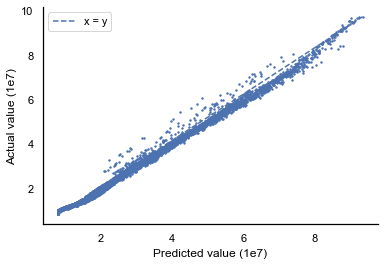

In [104]:
# Plot Y_pred and Y_test
fig = plt.figure()
ax = fig.gca()
ax.scatter(Y_pred/(10**7), Y_test/(10**7), s = 2)
ax.plot([Y_pred.min()/(10**7), Y_pred.max()/(10**7)],
        [Y_test.min()/(10**7), Y_test.max()/(10**7)], '--', label = 'x = y')
ax.set_ylabel('Actual value (1e7)')
ax.set_xlabel('Predicted value (1e7)')
ax.legend()
plt.savefig(f"figures/predictactual_vonmises.pdf", bbox_inches = "tight", format = "pdf")

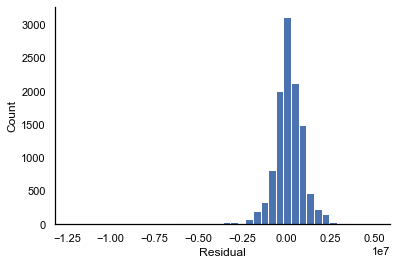

In [96]:
# Plot residuals distribution
fig = plt.figure()
ax = fig.gca()
ax.hist(Y_pred - Y_test, bins = 40)
ax.set_ylabel('Count')
ax.set_xlabel('Residual')
plt.savefig(f"figures/histresidual_vonmises.pdf", bbox_inches = "tight", format = "pdf")

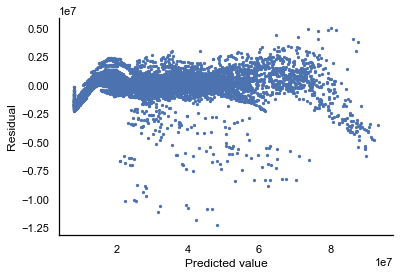

In [97]:
# Plot residuals vs actual value
fig = plt.figure()
ax = fig.gca()
plt.scatter(Y_pred, Y_pred - Y_test, s = 5)
ax.set_ylabel('Residual')
ax.set_xlabel('Predicted value')
plt.savefig(f"figures/predictedresidual_vonmises.pdf", bbox_inches = "tight", format = "pdf")

In [98]:
# R^2 and mean absolute and relative error
print(f'MAE {np.mean(np.abs(Y_test - Y_pred))}')
print(f'Relative = MAE/mean = {np.mean(np.abs(Y_test - Y_pred))/np.mean(Y_test)* 100}')
print(f'R^2: {r2_score(Y_test, Y_pred)*100}')

MAE 672500.6030000494
Relative = MAE/mean = 2.33144698219228
R^2: 99.50383522669522
